In [1]:
import geopandas as gpd
import matplotlib as mpl
import numpy as np
import pandas as pd
import shapely

from lonboard import Map, ScatterplotLayer

C:\Users\INAK05404\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
crash_data = r"C:\Aditya\Vehicle Incident Analysis\Crash_Analysis_System_(CAS)_data.csv"


In [3]:
crash_df = pd.read_csv(crash_data)
crash_df.head()


,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1.561971e+06,5.176725e+06,66388959,NaN,587702.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1.756263e+06,5.927631e+06,66388960,NaN,507900.0,0.0,NaN,1.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1.755375e+06,5.912110e+06,66388961,NaN,518701.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1.760027e+06,5.436020e+06,66388962,NaN,569100.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
4,2.032005e+06,5.708227e+06,66388963,NaN,544002.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Open,1.0,NaN,NaN,Light rain,Null


In [4]:
len(crash_df)


853454

In [5]:
type(crash_df[crash_df['advisorySpeed'].isnull()])

pandas.core.frame.DataFrame

In [6]:
crash_df[crash_df['advisorySpeed'].notnull()]

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
35,1.607652e+06,5.247800e+06,66388994,65.0,585700.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
46,2.057189e+06,5.726297e+06,66389005,75.0,544001.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,Open,0.0,0.0,0.0,Fine,Null
61,1.866939e+06,5.738601e+06,66389020,75.0,541334.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,1.0,0.0,Open,1.0,NaN,NaN,Fine,Null
67,1.796039e+06,5.577942e+06,66389026,45.0,559220.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Open,1.0,NaN,NaN,Heavy rain,Strong wind
72,1.932957e+06,5.618318e+06,66389031,35.0,547100.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853366,1.791549e+06,5.495979e+06,67739541,35.0,564021.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
853370,1.525302e+06,5.416870e+06,67739545,55.0,584407.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,Open,0.0,0.0,0.0,Fine,Null
853379,1.801013e+06,5.546136e+06,67739554,45.0,561421.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
853388,1.687615e+06,6.007730e+06,67739563,75.0,505010.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Mist or Fog,Null


In [8]:
crash_df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

In [9]:
keep_cols = [
    'OBJECTID',
    'X', 
    'Y',
    'advisorySpeed',
    'crashFinancialYear',
    'crashLocation1',
    'crashLocation2',
    'crashYear',
    'speedLimit',
    'crashSeverity',
    'fatalCount',
    'seriousInjuryCount'
    
]
crash_df=crash_df[keep_cols]

In [10]:
crash_df

,OBJECTID,X,Y,advisorySpeed,crashFinancialYear,crashLocation1,crashLocation2,crashYear,speedLimit,crashSeverity,fatalCount,seriousInjuryCount
0,66388959,1.561971e+06,5.176725e+06,NaN,2018/2019,HALSWELL JUNCTION ROAD,SPRINGS ROAD,2019,70.0,Non-Injury Crash,0.0,0.0
1,66388960,1.756263e+06,5.927631e+06,NaN,2018/2019,SMALES FARM BUS STATION RING RD,NaN,2019,50.0,Minor Crash,0.0,0.0
2,66388961,1.755375e+06,5.912110e+06,NaN,2018/2019,RICHARDSON ROAD,MCKINNON ST,2018,50.0,Non-Injury Crash,0.0,0.0
3,66388962,1.760027e+06,5.436020e+06,NaN,2017/2018,KNIGHTS ROAD,CORNWALL STREET,2018,50.0,Non-Injury Crash,0.0,0.0
4,66388963,2.032005e+06,5.708227e+06,NaN,2017/2018,SH 35,MCDONALD ROAD,2018,100.0,Serious Crash,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
853449,67739624,1.566529e+06,5.179322e+06,NaN,2023/2024,BLENHEIM ROAD,ACHERON DRIVE,2023,60.0,Non-Injury Crash,0.0,0.0
853450,67739625,1.722207e+06,6.044524e+06,NaN,2023/2024,RIVERSIDE DRIVE,MACKESY ROAD,2024,80.0,Minor Crash,0.0,0.0
853451,67739626,1.570396e+06,5.179137e+06,NaN,2023/2024,DURHAM STREET SOUTH,MOORHOUSE AVENUE,2023,50.0,Non-Injury Crash,0.0,0.0
853452,67739627,1.752522e+06,5.916192e+06,NaN,2023/2024,NEW NORTH ROAD,MCLEAN STREET,2023,50.0,Non-Injury Crash,0.0,0.0


In [11]:
crash_df.dtypes

OBJECTID                int64
X                     float64
Y                     float64
advisorySpeed         float64
crashFinancialYear     object
crashLocation1         object
crashLocation2         object
crashYear               int64
speedLimit            float64
crashSeverity          object
fatalCount            float64
seriousInjuryCount    float64
dtype: object

In [12]:
# Concatenate crashLocation1 and crashLocation2 with a space in between, and store the result in crash_loc
# Fill NaN values with empty strings and then concatenate
crash_df["crash_loc"] = crash_df["crashLocation1"].fillna('') + "," + crash_df["crashLocation2"].fillna('')



In [13]:
crash_df

,OBJECTID,X,Y,advisorySpeed,crashFinancialYear,crashLocation1,crashLocation2,crashYear,speedLimit,crashSeverity,fatalCount,seriousInjuryCount,crash_loc
0,66388959,1.561971e+06,5.176725e+06,NaN,2018/2019,HALSWELL JUNCTION ROAD,SPRINGS ROAD,2019,70.0,Non-Injury Crash,0.0,0.0,"HALSWELL JUNCTION ROAD,SPRINGS ROAD"
1,66388960,1.756263e+06,5.927631e+06,NaN,2018/2019,SMALES FARM BUS STATION RING RD,NaN,2019,50.0,Minor Crash,0.0,0.0,"SMALES FARM BUS STATION RING RD,"
2,66388961,1.755375e+06,5.912110e+06,NaN,2018/2019,RICHARDSON ROAD,MCKINNON ST,2018,50.0,Non-Injury Crash,0.0,0.0,"RICHARDSON ROAD,MCKINNON ST"
3,66388962,1.760027e+06,5.436020e+06,NaN,2017/2018,KNIGHTS ROAD,CORNWALL STREET,2018,50.0,Non-Injury Crash,0.0,0.0,"KNIGHTS ROAD,CORNWALL STREET"
4,66388963,2.032005e+06,5.708227e+06,NaN,2017/2018,SH 35,MCDONALD ROAD,2018,100.0,Serious Crash,0.0,1.0,"SH 35,MCDONALD ROAD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
853449,67739624,1.566529e+06,5.179322e+06,NaN,2023/2024,BLENHEIM ROAD,ACHERON DRIVE,2023,60.0,Non-Injury Crash,0.0,0.0,"BLENHEIM ROAD,ACHERON DRIVE"
853450,67739625,1.722207e+06,6.044524e+06,NaN,2023/2024,RIVERSIDE DRIVE,MACKESY ROAD,2024,80.0,Minor Crash,0.0,0.0,"RIVERSIDE DRIVE,MACKESY ROAD"
853451,67739626,1.570396e+06,5.179137e+06,NaN,2023/2024,DURHAM STREET SOUTH,MOORHOUSE AVENUE,2023,50.0,Non-Injury Crash,0.0,0.0,"DURHAM STREET SOUTH,MOORHOUSE AVENUE"
853452,67739627,1.752522e+06,5.916192e+06,NaN,2023/2024,NEW NORTH ROAD,MCLEAN STREET,2023,50.0,Non-Injury Crash,0.0,0.0,"NEW NORTH ROAD,MCLEAN STREET"


In [14]:
crash_df.iloc[1,12]

'SMALES FARM BUS STATION RING RD,'

In [15]:
from shapely.geometry import Point
import geopandas as gpd

# Creating the geometry column using the X and Y columns
geometry = [Point(x, y) for x, y in zip(crash_df["X"], crash_df["Y"])]

# Creating the GeoDataFrame
crash_gdf = gpd.GeoDataFrame(crash_df, geometry=geometry)


In [16]:
crash_gdf

,OBJECTID,X,Y,advisorySpeed,crashFinancialYear,crashLocation1,crashLocation2,crashYear,speedLimit,crashSeverity,fatalCount,seriousInjuryCount,crash_loc,geometry
0,66388959,1.561971e+06,5.176725e+06,NaN,2018/2019,HALSWELL JUNCTION ROAD,SPRINGS ROAD,2019,70.0,Non-Injury Crash,0.0,0.0,"HALSWELL JUNCTION ROAD,SPRINGS ROAD",POINT (1561971.367 5176724.578)
1,66388960,1.756263e+06,5.927631e+06,NaN,2018/2019,SMALES FARM BUS STATION RING RD,NaN,2019,50.0,Minor Crash,0.0,0.0,"SMALES FARM BUS STATION RING RD,",POINT (1756263.222 5927631.286)
2,66388961,1.755375e+06,5.912110e+06,NaN,2018/2019,RICHARDSON ROAD,MCKINNON ST,2018,50.0,Non-Injury Crash,0.0,0.0,"RICHARDSON ROAD,MCKINNON ST",POINT (1755375.000 5912110.000)
3,66388962,1.760027e+06,5.436020e+06,NaN,2017/2018,KNIGHTS ROAD,CORNWALL STREET,2018,50.0,Non-Injury Crash,0.0,0.0,"KNIGHTS ROAD,CORNWALL STREET",POINT (1760027.078 5436019.677)
4,66388963,2.032005e+06,5.708227e+06,NaN,2017/2018,SH 35,MCDONALD ROAD,2018,100.0,Serious Crash,0.0,1.0,"SH 35,MCDONALD ROAD",POINT (2032005.000 5708227.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853449,67739624,1.566529e+06,5.179322e+06,NaN,2023/2024,BLENHEIM ROAD,ACHERON DRIVE,2023,60.0,Non-Injury Crash,0.0,0.0,"BLENHEIM ROAD,ACHERON DRIVE",POINT (1566528.861 5179321.782)
853450,67739625,1.722207e+06,6.044524e+06,NaN,2023/2024,RIVERSIDE DRIVE,MACKESY ROAD,2024,80.0,Minor Crash,0.0,0.0,"RIVERSIDE DRIVE,MACKESY ROAD",POINT (1722206.731 6044523.957)
853451,67739626,1.570396e+06,5.179137e+06,NaN,2023/2024,DURHAM STREET SOUTH,MOORHOUSE AVENUE,2023,50.0,Non-Injury Crash,0.0,0.0,"DURHAM STREET SOUTH,MOORHOUSE AVENUE",POINT (1570395.753 5179137.223)
853452,67739627,1.752522e+06,5.916192e+06,NaN,2023/2024,NEW NORTH ROAD,MCLEAN STREET,2023,50.0,Non-Injury Crash,0.0,0.0,"NEW NORTH ROAD,MCLEAN STREET",POINT (1752521.982 5916191.636)


In [17]:
crash_gdf.head()

,OBJECTID,X,Y,advisorySpeed,crashFinancialYear,crashLocation1,crashLocation2,crashYear,speedLimit,crashSeverity,fatalCount,seriousInjuryCount,crash_loc,geometry
0,66388959,1.561971e+06,5.176725e+06,NaN,2018/2019,HALSWELL JUNCTION ROAD,SPRINGS ROAD,2019,70.0,Non-Injury Crash,0.0,0.0,"HALSWELL JUNCTION ROAD,SPRINGS ROAD",POINT (1561971.367 5176724.578)
1,66388960,1.756263e+06,5.927631e+06,NaN,2018/2019,SMALES FARM BUS STATION RING RD,NaN,2019,50.0,Minor Crash,0.0,0.0,"SMALES FARM BUS STATION RING RD,",POINT (1756263.222 5927631.286)
2,66388961,1.755375e+06,5.912110e+06,NaN,2018/2019,RICHARDSON ROAD,MCKINNON ST,2018,50.0,Non-Injury Crash,0.0,0.0,"RICHARDSON ROAD,MCKINNON ST",POINT (1755375.000 5912110.000)
3,66388962,1.760027e+06,5.436020e+06,NaN,2017/2018,KNIGHTS ROAD,CORNWALL STREET,2018,50.0,Non-Injury Crash,0.0,0.0,"KNIGHTS ROAD,CORNWALL STREET",POINT (1760027.078 5436019.677)
4,66388963,2.032005e+06,5.708227e+06,NaN,2017/2018,SH 35,MCDONALD ROAD,2018,100.0,Serious Crash,0.0,1.0,"SH 35,MCDONALD ROAD",POINT (2032005.000 5708227.000)


In [18]:
import geopandas as gpd
from pyproj import Transformer

# Define the CRS for NZTM and WGS84
nztm = "EPSG:2193"  # NZGD 2000 New Zealand Transverse Mercator
wgs84 = "EPSG:4326"  # WGS84

# Convert crash_gdf to WGS84
crash_gdf = crash_gdf.set_crs(nztm)  # Set the current CRS to NZTM
crash_gdf = crash_gdf.to_crs(wgs84)  # Convert to WGS84

# Check the converted coordinates
print(crash_gdf.head())


   OBJECTID             X             Y  advisorySpeed crashFinancialYear  \
0  66388959  1.561971e+06  5.176725e+06            NaN          2018/2019   
1  66388960  1.756263e+06  5.927631e+06            NaN          2018/2019   
2  66388961  1.755375e+06  5.912110e+06            NaN          2018/2019   
3  66388962  1.760027e+06  5.436020e+06            NaN          2017/2018   
4  66388963  2.032005e+06  5.708227e+06            NaN          2017/2018   

                    crashLocation1   crashLocation2  crashYear  speedLimit  \
0           HALSWELL JUNCTION ROAD     SPRINGS ROAD       2019        70.0   
1  SMALES FARM BUS STATION RING RD              NaN       2019        50.0   
2                  RICHARDSON ROAD      MCKINNON ST       2018        50.0   
3                     KNIGHTS ROAD  CORNWALL STREET       2018        50.0   
4                            SH 35    MCDONALD ROAD       2018       100.0   

      crashSeverity  fatalCount  seriousInjuryCount  \
0  Non-Injury

In [19]:
crash_gdf.head()

,OBJECTID,X,Y,advisorySpeed,crashFinancialYear,crashLocation1,crashLocation2,crashYear,speedLimit,crashSeverity,fatalCount,seriousInjuryCount,crash_loc,geometry
0,66388959,1.561971e+06,5.176725e+06,NaN,2018/2019,HALSWELL JUNCTION ROAD,SPRINGS ROAD,2019,70.0,Non-Injury Crash,0.0,0.0,"HALSWELL JUNCTION ROAD,SPRINGS ROAD",POINT (172.52913 -43.56147)
1,66388960,1.756263e+06,5.927631e+06,NaN,2018/2019,SMALES FARM BUS STATION RING RD,NaN,2019,50.0,Minor Crash,0.0,0.0,"SMALES FARM BUS STATION RING RD,",POINT (174.75123 -36.78425)
2,66388961,1.755375e+06,5.912110e+06,NaN,2018/2019,RICHARDSON ROAD,MCKINNON ST,2018,50.0,Non-Injury Crash,0.0,0.0,"RICHARDSON ROAD,MCKINNON ST",POINT (174.74445 -36.92425)
3,66388962,1.760027e+06,5.436020e+06,NaN,2017/2018,KNIGHTS ROAD,CORNWALL STREET,2018,50.0,Non-Injury Crash,0.0,0.0,"KNIGHTS ROAD,CORNWALL STREET",POINT (174.90885 -41.21139)
4,66388963,2.032005e+06,5.708227e+06,NaN,2017/2018,SH 35,MCDONALD ROAD,2018,100.0,Serious Crash,0.0,1.0,"SH 35,MCDONALD ROAD",POINT (177.96457 -38.66915)


In [20]:
print(len(crash_gdf))


853454


In [21]:
crash_gdf.total_bounds

array([-176.76076196,  -46.90484878,  178.54435722,  -34.43021413])

In [22]:
nz_bbox = [166.0, -47.0, 179.0, -34.0]


In [23]:
crash_gdf = crash_gdf[crash_gdf.intersects(shapely.box(*nz_bbox))]

In [24]:
layer = ScatterplotLayer.from_geopandas(crash_gdf)
map = Map(layers=[layer], _height=800)
map

Map(layers=[ScatterplotLayer(table=pyarrow.Table
OBJECTID: uint32
X: double
Y: double
advisorySpeed: uint8
cra…

In [25]:
num_fatal = crash_gdf['fatalCount'].value_counts()
num_fatal

fatalCount
0.0    845382
1.0      7108
2.0       598
3.0       119
4.0        40
5.0         7
6.0         3
7.0         2
9.0         1
8.0         1
Name: count, dtype: int64

In [26]:
type(num_fatal)

pandas.core.series.Series

In [27]:
num_fatal = crash_gdf['fatalCount'].values  # Ensure this is a numpy array
layer.get_radius = np.array(num_fatal + 1)


In [28]:
layer.radius_scale = 20
layer.opacity = 0.05

# Showing relationship between Fatal crashes and Speed Limit 

In [29]:
# Filter for fatal crashes
fatal_crashes = crash_gdf[crash_gdf['crashSeverity'] == 'Fatal Crash']
fatal_crashes

,OBJECTID,X,Y,advisorySpeed,crashFinancialYear,crashLocation1,crashLocation2,crashYear,speedLimit,crashSeverity,fatalCount,seriousInjuryCount,crash_loc,geometry
224,66389183,1.772809e+06,5.890786e+06,NaN,2018/2019,GREAT SOUTH ROAD,Pitt Road,2018,100.0,Fatal Crash,1.0,0.0,"GREAT SOUTH ROAD,Pitt Road",POINT (174.94498 -37.11333)
231,66389190,1.607422e+06,5.421132e+06,55.0,2018/2019,WAIMEA WEST ROAD,TEAPOT VALLEY ROAD,2019,100.0,Fatal Crash,1.0,0.0,"WAIMEA WEST ROAD,TEAPOT VALLEY ROAD",POINT (173.08873 -41.36128)
331,66389290,1.884846e+06,5.825498e+06,NaN,2018/2019,GIRVEN ROAD,HAWEA STREET,2019,50.0,Fatal Crash,1.0,0.0,"GIRVEN ROAD,HAWEA STREET",POINT (176.22965 -37.67353)
336,66389295,1.536586e+06,5.163889e+06,NaN,2019/2020,DUNSANDEL & BROOKSIDE ROAD,LEESTON DUNSANDEL ROAD,2019,100.0,Fatal Crash,1.0,0.0,"DUNSANDEL & BROOKSIDE ROAD,LEESTON DUNSANDEL ROAD",POINT (172.21333 -43.67530)
387,66389346,1.760336e+06,5.903442e+06,NaN,2018/2019,PUHINUI ROAD,HAPE DRIVE,2019,50.0,Fatal Crash,1.0,0.0,"PUHINUI ROAD,HAPE DRIVE",POINT (174.80197 -37.00152)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852660,67738835,1.511671e+06,5.159259e+06,NaN,2023/2024,BACK TRACK,MITCHAM ROAD,2023,100.0,Fatal Crash,1.0,0.0,"BACK TRACK,MITCHAM ROAD",POINT (171.90354 -43.71444)
852698,67738873,1.883618e+06,5.768686e+06,NaN,2023/2024,SH 30,ROTORUA LANDFILL,2023,100.0,Fatal Crash,1.0,0.0,"SH 30,ROTORUA LANDFILL",POINT (176.23812 -38.18513)
852907,67739082,1.849846e+06,5.541186e+06,NaN,2023/2024,TOP GRASS ROAD,KEARNEY ROAD,2023,100.0,Fatal Crash,1.0,0.0,"TOP GRASS ROAD,KEARNEY ROAD",POINT (175.93718 -40.24252)
853014,67739189,1.495709e+06,5.180773e+06,NaN,2023/2024,RAKAIA GORGE ROAD,LEACHES ROAD,2024,100.0,Fatal Crash,1.0,0.0,"RAKAIA GORGE ROAD,LEACHES ROAD",POINT (171.70959 -43.51870)


# Grouping the speed limit based on the crash severity

In [30]:
fatal_count_by_speedlimit = fatal_crashes.groupby('speedLimit').size()
fatal_count_by_speedlimit

speedLimit
10.0        5
20.0        9
30.0       26
40.0       10
50.0     1637
60.0      176
70.0      331
80.0      418
90.0       19
100.0    5229
110.0       3
dtype: int64

In [31]:
# Convert the Series to a DataFrame and rename the count column
fatal_count_df = fatal_count_by_speedlimit.reset_index(name='Total Fatal Crashes')


In [32]:
#Handle cases with no crashes for a given speed limit 
fatal_count_df = fatal_count_df.sort_values(by='speedLimit').reset_index(drop=True)


In [33]:
fatal_count_df

,speedLimit,Total Fatal Crashes
0,10.0,5
1,20.0,9
2,30.0,26
3,40.0,10
4,50.0,1637
5,60.0,176
6,70.0,331
7,80.0,418
8,90.0,19
9,100.0,5229


# Plotting Using Matplotlib

In [34]:
import matplotlib.pyplot as plt

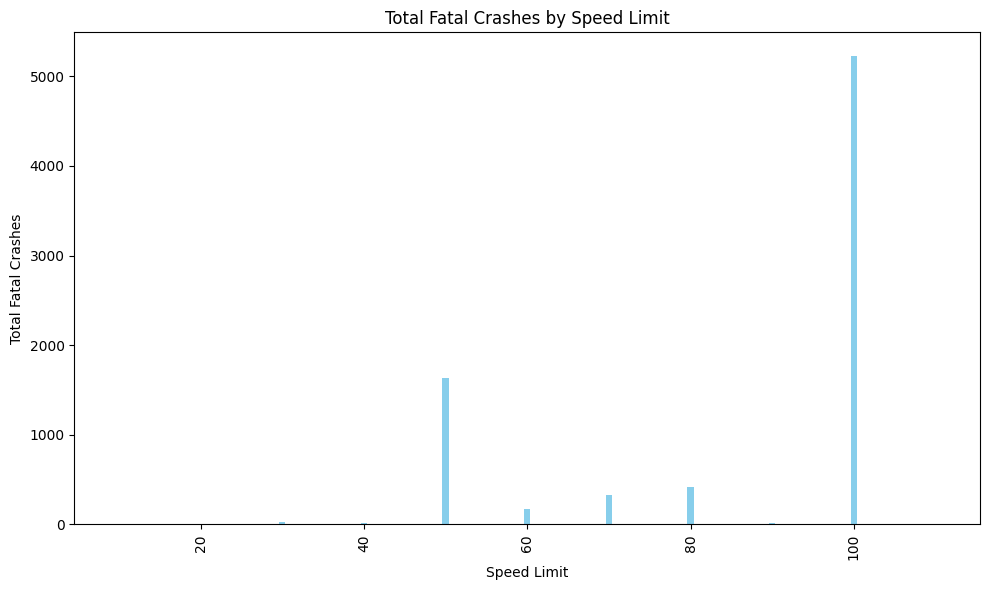

In [35]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(fatal_count_df['speedLimit'], fatal_count_df['Total Fatal Crashes'], color='skyblue')
plt.xlabel('Speed Limit')
plt.ylabel('Total Fatal Crashes')
plt.title('Total Fatal Crashes by Speed Limit')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


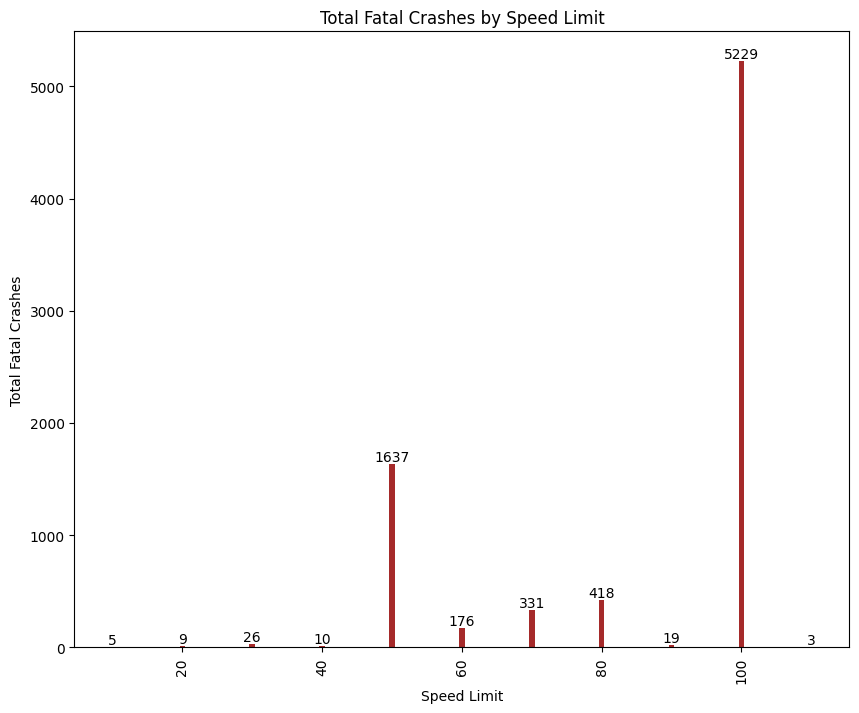

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Increase figure size if necessary
bars = plt.bar(fatal_count_df['speedLimit'], fatal_count_df['Total Fatal Crashes'], color='brown', width=0.8)  # Adjust bar width

# Optionally, add labels to bars for better visibility
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Speed Limit')
plt.ylabel('Total Fatal Crashes')
plt.title('Total Fatal Crashes by Speed Limit')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
#plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


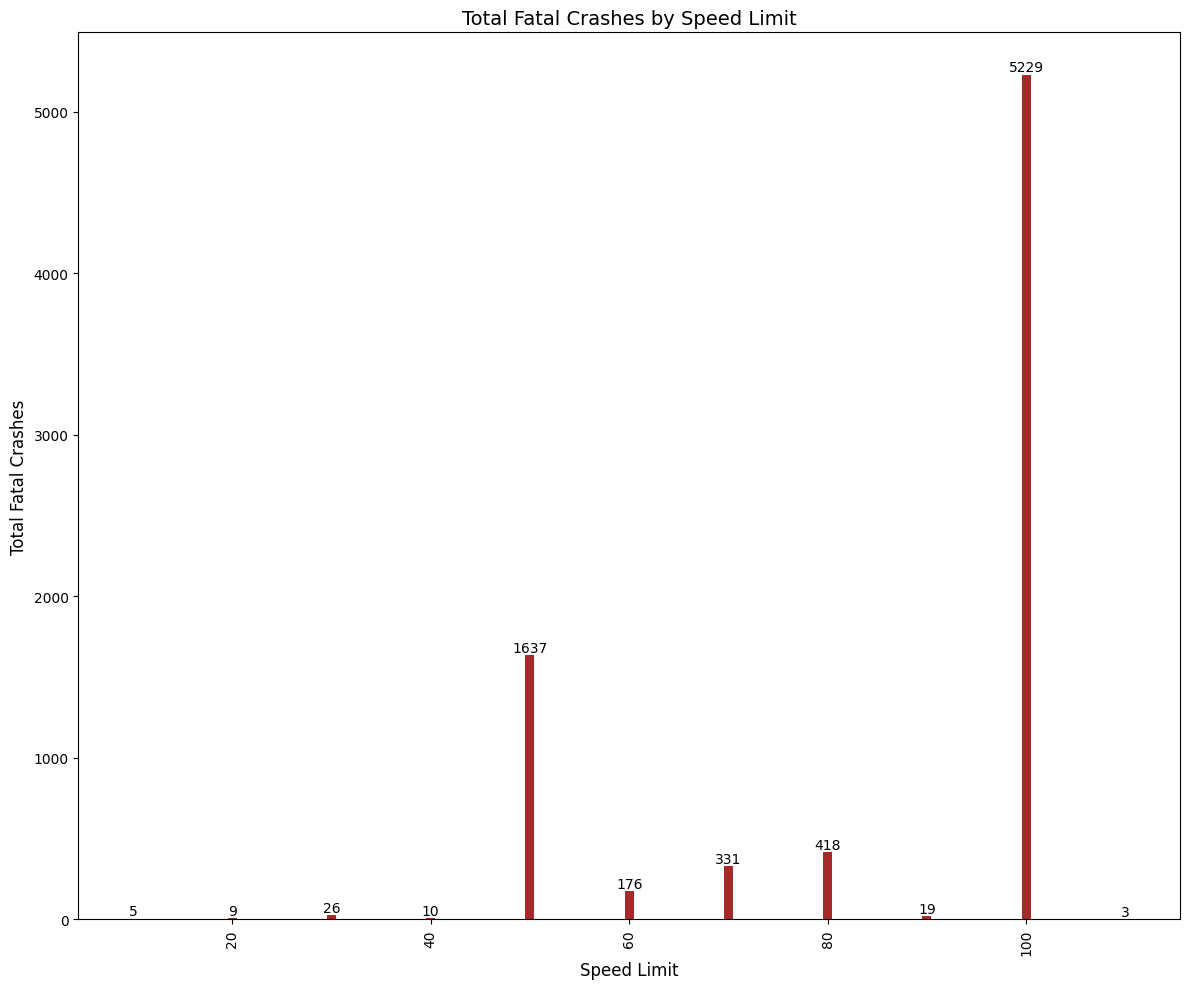

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Increase figure size for better visibility
bars = plt.bar(fatal_count_df['speedLimit'], fatal_count_df['Total Fatal Crashes'], color='brown', width=0.9)  # Increase bar width

# Add labels to bars for better visibility
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}', ha='center', va='bottom', fontsize=10)  # Adjust label position and font size

plt.xlabel('Speed Limit', fontsize=12)
plt.ylabel('Total Fatal Crashes', fontsize=12)
plt.title('Total Fatal Crashes by Speed Limit', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels if necessary and increase font size
plt.yticks(fontsize=10)  # Increase y-axis labels font size
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [37]:
fatal_crashes.total_bounds

array([167.68133282, -46.90033011, 178.42655548, -34.50163587])

In [38]:
fatal_crashes = fatal_crashes[fatal_crashes.intersects(shapely.box(*nz_bbox))]

In [39]:
layer2 = ScatterplotLayer.from_geopandas(fatal_crashes)
map = Map(layers=[layer2], _height=800)
map

Map(layers=[ScatterplotLayer(table=pyarrow.Table
OBJECTID: uint32
X: double
Y: double
advisorySpeed: uint8
cra…

In [40]:
crash_gdf

,OBJECTID,X,Y,advisorySpeed,crashFinancialYear,crashLocation1,crashLocation2,crashYear,speedLimit,crashSeverity,fatalCount,seriousInjuryCount,crash_loc,geometry
0,66388959,1.561971e+06,5.176725e+06,NaN,2018/2019,HALSWELL JUNCTION ROAD,SPRINGS ROAD,2019,70.0,Non-Injury Crash,0.0,0.0,"HALSWELL JUNCTION ROAD,SPRINGS ROAD",POINT (172.52913 -43.56147)
1,66388960,1.756263e+06,5.927631e+06,NaN,2018/2019,SMALES FARM BUS STATION RING RD,NaN,2019,50.0,Minor Crash,0.0,0.0,"SMALES FARM BUS STATION RING RD,",POINT (174.75123 -36.78425)
2,66388961,1.755375e+06,5.912110e+06,NaN,2018/2019,RICHARDSON ROAD,MCKINNON ST,2018,50.0,Non-Injury Crash,0.0,0.0,"RICHARDSON ROAD,MCKINNON ST",POINT (174.74445 -36.92425)
3,66388962,1.760027e+06,5.436020e+06,NaN,2017/2018,KNIGHTS ROAD,CORNWALL STREET,2018,50.0,Non-Injury Crash,0.0,0.0,"KNIGHTS ROAD,CORNWALL STREET",POINT (174.90885 -41.21139)
4,66388963,2.032005e+06,5.708227e+06,NaN,2017/2018,SH 35,MCDONALD ROAD,2018,100.0,Serious Crash,0.0,1.0,"SH 35,MCDONALD ROAD",POINT (177.96457 -38.66915)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853449,67739624,1.566529e+06,5.179322e+06,NaN,2023/2024,BLENHEIM ROAD,ACHERON DRIVE,2023,60.0,Non-Injury Crash,0.0,0.0,"BLENHEIM ROAD,ACHERON DRIVE",POINT (172.58572 -43.53830)
853450,67739625,1.722207e+06,6.044524e+06,NaN,2023/2024,RIVERSIDE DRIVE,MACKESY ROAD,2024,80.0,Minor Crash,0.0,0.0,"RIVERSIDE DRIVE,MACKESY ROAD",POINT (174.35139 -35.73570)
853451,67739626,1.570396e+06,5.179137e+06,NaN,2023/2024,DURHAM STREET SOUTH,MOORHOUSE AVENUE,2023,50.0,Non-Injury Crash,0.0,0.0,"DURHAM STREET SOUTH,MOORHOUSE AVENUE",POINT (172.63357 -43.54012)
853452,67739627,1.752522e+06,5.916192e+06,NaN,2023/2024,NEW NORTH ROAD,MCLEAN STREET,2023,50.0,Non-Injury Crash,0.0,0.0,"NEW NORTH ROAD,MCLEAN STREET",POINT (174.71161 -36.88793)
